In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, spearmanr
import sys
import matplotlib.pyplot as plt

In [195]:
coseq_matrix_path = './smallseq_counts_mgdb.tsv'
df_coseq_all = pd.read_csv(coseq_matrix_path, sep='\t', index_col=0)
print(df_coseq_all.shape)

(70558, 1152)


____________

In [ ]:
remove_pre_2R = True
rm_430 = False
stage = 'E3'

In [425]:
mirna_origin_file_path = '../MirGeneDB_miRNA_origin/hsa_mirgenedb3.0_to_everything.mirna_origin.tsv'
df_mirna_origin = pd.read_csv(mirna_origin_file_path, sep='\t', header=None)
# keep only columns 8,14,15 and remove duplicates
df_mirna_origin = df_mirna_origin[[0, 14, 15]]
df_mirna_origin = df_mirna_origin.drop_duplicates()
cols = ["miRNA", "locus_node_of_origin", "family_node_of_origin"]
df_mirna_origin.columns = cols
df_mirna_origin

mirna_lno_dict = {}
for index, row in df_mirna_origin.iterrows():
	mirna = row['miRNA']
	lno = row['family_node_of_origin']
	if mirna not in mirna_lno_dict:
		mirna_lno_dict[mirna] = []
	mirna_lno_dict[mirna].append(lno)

print("Test on 'Hsa-Let-7-P1d': ", mirna_lno_dict['Hsa-Let-7-P1d'][0])

Test on 'Hsa-Let-7-P1d':  Bilateria


In [426]:
pre_2R_clades = ['Bilateria', 
                 'Chordata', 
                 'Eumetazoa', 
                #'Vertebrata', 
                 'Nephrozoa', 
                 'Olphactores']

def all_clades_in_pre2R(mirna):
    clades = mirna_lno_dict.get(mirna, [])
    return all(clade in pre_2R_clades for clade in clades)

____________

In [427]:
df_coseq_all

unknown_mirna   type  E7_9_9  E7_9_17  E7_9_25  \
ID                                                                            
hsa-miR-3158-3p  premirna_not_in_mirgenedb  miRNA     0.0      0.0      0.0   
hsa-miR-3158-5p  premirna_not_in_mirgenedb  miRNA     0.0      0.0      0.0   
hsa-miR-146b-5p             Hsa-Mir-146-P1  miRNA     0.0      2.0      1.0   
hsa-miR-146b-3p             Hsa-Mir-146-P1  miRNA     0.0      0.0      0.0   
hsa-miR-1307-3p               Hsa-Mir-1307  miRNA     2.0      2.0      0.0   
...                                    ...    ...     ...      ...      ...   
os-piRNA-13                  unknown_mirna  piRNA     0.0      0.0      0.0   
os-piRNA-14                  unknown_mirna  piRNA     0.0      0.0      0.0   
os-piRNA-11                  unknown_mirna  piRNA     0.0      0.0      0.0   
os-piRNA-18                  unknown_mirna  piRNA     0.0      0.0      0.0   
os-piRNA-15                  unknown_mirna  piRNA     0.0      0.0      0.0   

                 E6_21_1  E6_24_9  E6_24_17  E5_14_1  E5_14_9  ...  E6_40_8  \
ID                                                             ...            
hsa-miR-3158-3p      0.0      0.0       0.0      0.0      0.0  ...      0.0   
hsa-miR-3158-5p      0.0      0.0       0.0      0.0      0.0  ...      0.0   
hsa-miR-146b-5p      2.0      0.0       0.0      2.0      1.0  ...      3.0   
hsa-miR-146b-3p      0.0      0.0       0.0      0.0      0.0  ...      0.0   
hsa-miR-1307-3p      0.0      0.0       1.0      1.0      0.0  ...      0.0   
...                  ...      ...       ...      ...      ...  ...      ...   
os-piRNA-13          0.0      0.0       0.0      0.0      0.0  ...      0.0   
os-piRNA-14          0.0      0.0       0.0      0.0      0.0  ...      0.0   
os-piRNA-11          1.0      0.0       0.0      0.0      0.0  ...      0.0   
os-piRNA-18          0.0      0.0       0.0      0.0      0.0  ...      0.0   
os-piRNA-15          2.0      0.0       1.0      0.0      0.0  ...      0.0   

                 E6_40_16  E6_40_24  E5_31_24  E5_32_16  E5_32_24  E7_44_8  \
ID                                                                           
hsa-miR-3158-3p       0.0       0.0       0.0       0.0       0.0      0.0   
hsa-miR-3158-5p       0.0       0.0       0.0       0.0       0.0      0.0   
hsa-miR-146b-5p       0.0       1.0       1.0       5.0       0.0      0.0   
hsa-miR-146b-3p       0.0       0.0       0.0       0.0       0.0      0.0   
hsa-miR-1307-3p       1.0       2.0       0.0       1.0       0.0      1.0   
...                   ...       ...       ...       ...       ...      ...   
os-piRNA-13           0.0       0.0       0.0       0.0       0.0      0.0   
os-piRNA-14           0.0       0.0       0.0       0.0       0.0      0.0   
os-piRNA-11           0.0       1.0       0.0       0.0       0.0      0.0   
os-piRNA-18           0.0       0.0       0.0       0.0       0.0      0.0   
os-piRNA-15           0.0       0.0       0.0       0.0       0.0      0.0   

                 E7_44_32  E7_44_40  E7_44_48  
ID                                             
hsa-miR-3158-3p       0.0       0.0       0.0  
hsa-miR-3158-5p       0.0       0.0       0.0  
hsa-miR-146b-5p       0.0       0.0       1.0  
hsa-miR-146b-3p       0.0       0.0       0.0  
hsa-miR-1307-3p       0.0       1.0       5.0  
...                   ...       ...       ...  
os-piRNA-13           0.0       0.0       0.0  
os-piRNA-14           0.0       0.0       0.0  
os-piRNA-11           0.0       0.0       0.0  
os-piRNA-18           0.0       0.0       0.0  
os-piRNA-15           0.0       0.0       0.0  

[70558 rows x 1152 columns]

In [428]:
df_coseq = df_coseq_all.loc[:, df_coseq_all.columns.str.startswith((stage, 'ID', 'unknown_mirna', 'type'))]
print(df_coseq.shape)

(70558, 117)


In [429]:
df_coseq

unknown_mirna   type  E4_12_9  E4_12_5  E4_12_8  \
ID                                                                             
hsa-miR-3158-3p  premirna_not_in_mirgenedb  miRNA      0.0      0.0      0.0   
hsa-miR-3158-5p  premirna_not_in_mirgenedb  miRNA      0.0      0.0      0.0   
hsa-miR-146b-5p             Hsa-Mir-146-P1  miRNA      0.0      3.0      0.0   
hsa-miR-146b-3p             Hsa-Mir-146-P1  miRNA      0.0      0.0      0.0   
hsa-miR-1307-3p               Hsa-Mir-1307  miRNA      1.0      0.0      0.0   
...                                    ...    ...      ...      ...      ...   
os-piRNA-13                  unknown_mirna  piRNA      0.0      0.0      0.0   
os-piRNA-14                  unknown_mirna  piRNA      0.0      0.0      0.0   
os-piRNA-11                  unknown_mirna  piRNA      0.0      0.0      0.0   
os-piRNA-18                  unknown_mirna  piRNA      0.0      0.0      0.0   
os-piRNA-15                  unknown_mirna  piRNA      0.0      0.0      0.0   

                 E4_4_1  E4_4_2  E4_4_4  E4_4_5  E4_4_6  ...  E4_9_14  \
ID                                                       ...            
hsa-miR-3158-3p     0.0     0.0     1.0     0.0     0.0  ...      0.0   
hsa-miR-3158-5p     0.0     0.0     0.0     0.0     0.0  ...      0.0   
hsa-miR-146b-5p     1.0     5.0     4.0     9.0    33.0  ...      6.0   
hsa-miR-146b-3p     0.0     0.0     0.0     1.0     4.0  ...      0.0   
hsa-miR-1307-3p     0.0     1.0     1.0     1.0     7.0  ...      9.0   
...                 ...     ...     ...     ...     ...  ...      ...   
os-piRNA-13         0.0     0.0     0.0     0.0     0.0  ...      0.0   
os-piRNA-14         0.0     1.0     0.0     2.0     0.0  ...      0.0   
os-piRNA-11         0.0     1.0     1.0     1.0     1.0  ...      2.0   
os-piRNA-18         0.0     0.0     0.0     1.0     0.0  ...      0.0   
os-piRNA-15         0.0     4.0     5.0     6.0    11.0  ...      1.0   

                 E4_30_1  E4_30_9  E4_30_2  E4_30_10  E4_30_3  E4_30_4  \
ID                                                                       
hsa-miR-3158-3p      0.0      1.0      0.0       0.0      0.0      0.0   
hsa-miR-3158-5p      0.0      0.0      0.0       0.0      0.0      0.0   
hsa-miR-146b-5p      4.0      1.0      3.0      10.0     16.0      4.0   
hsa-miR-146b-3p      0.0      0.0      0.0       0.0      0.0      1.0   
hsa-miR-1307-3p      2.0      1.0      0.0       6.0     12.0      2.0   
...                  ...      ...      ...       ...      ...      ...   
os-piRNA-13          0.0      0.0      0.0       0.0      0.0      0.0   
os-piRNA-14          0.0      0.0      0.0       1.0      2.0      0.0   
os-piRNA-11          0.0      0.0      0.0       1.0      4.0      0.0   
os-piRNA-18          1.0      0.0      0.0       0.0      0.0      0.0   
os-piRNA-15          0.0      0.0      0.0       3.0      4.0      0.0   

                 E4_30_5  E4_30_6  E4_30_7  
ID                                          
hsa-miR-3158-3p      0.0      0.0      0.0  
hsa-miR-3158-5p      0.0      1.0      0.0  
hsa-miR-146b-5p      1.0      3.0     11.0  
hsa-miR-146b-3p      0.0      0.0      1.0  
hsa-miR-1307-3p      1.0      0.0      6.0  
...                  ...      ...      ...  
os-piRNA-13          0.0      0.0      0.0  
os-piRNA-14          0.0      0.0      0.0  
os-piRNA-11          0.0      0.0      0.0  
os-piRNA-18          0.0      0.0      0.0  
os-piRNA-15          1.0      0.0      1.0  

[70558 rows x 117 columns]

In [430]:
# remov the rows whose second column is "unknown_mirna"
df_coseq = df_coseq[df_coseq.iloc[:, 0] != 'unknown_mirna']
df_coseq
print(df_coseq.shape)

(1761, 117)


In [431]:
# remove the "type" column
df_coseq = df_coseq.drop(columns=['type'])
df_coseq

unknown_mirna  E4_12_9  E4_12_5  E4_12_8  E4_4_1  \
ID                                                                              
hsa-miR-3158-3p  premirna_not_in_mirgenedb      0.0      0.0      0.0     0.0   
hsa-miR-3158-5p  premirna_not_in_mirgenedb      0.0      0.0      0.0     0.0   
hsa-miR-146b-5p             Hsa-Mir-146-P1      0.0      3.0      0.0     1.0   
hsa-miR-146b-3p             Hsa-Mir-146-P1      0.0      0.0      0.0     0.0   
hsa-miR-1307-3p               Hsa-Mir-1307      1.0      0.0      0.0     0.0   
...                                    ...      ...      ...      ...     ...   
hsa-miR-325                    Hsa-Mir-325      0.0      0.0      0.0     0.0   
hsa-miR-651-5p                 Hsa-Mir-651      0.0      0.0      0.0     0.0   
hsa-miR-651-3p                 Hsa-Mir-651      0.0      0.0      0.0     0.0   
hsa-miR-361-3p                 Hsa-Mir-361      0.0      0.0      0.0     0.0   
hsa-miR-361-5p                 Hsa-Mir-361      0.0      0.0      1.0     0.0   

                 E4_4_2  E4_4_4  E4_4_5  E4_4_6  E4_4_9  ...  E4_9_14  \
ID                                                       ...            
hsa-miR-3158-3p     0.0     1.0     0.0     0.0     2.0  ...      0.0   
hsa-miR-3158-5p     0.0     0.0     0.0     0.0     0.0  ...      0.0   
hsa-miR-146b-5p     5.0     4.0     9.0    33.0    23.5  ...      6.0   
hsa-miR-146b-3p     0.0     0.0     1.0     4.0     1.5  ...      0.0   
hsa-miR-1307-3p     1.0     1.0     1.0     7.0     8.0  ...      9.0   
...                 ...     ...     ...     ...     ...  ...      ...   
hsa-miR-325         0.0     0.0     0.0     0.0     0.0  ...      0.0   
hsa-miR-651-5p      0.0     0.0     0.0     0.0     0.0  ...      0.0   
hsa-miR-651-3p      0.0     0.0     0.0     0.0     0.0  ...      0.0   
hsa-miR-361-3p      0.0     0.0     0.0     0.0     2.0  ...      2.0   
hsa-miR-361-5p      2.0     1.0     0.0     3.0     3.0  ...      1.0   

                 E4_30_1  E4_30_9  E4_30_2  E4_30_10  E4_30_3  E4_30_4  \
ID                                                                       
hsa-miR-3158-3p      0.0      1.0      0.0       0.0      0.0      0.0   
hsa-miR-3158-5p      0.0      0.0      0.0       0.0      0.0      0.0   
hsa-miR-146b-5p      4.0      1.0      3.0      10.0     16.0      4.0   
hsa-miR-146b-3p      0.0      0.0      0.0       0.0      0.0      1.0   
hsa-miR-1307-3p      2.0      1.0      0.0       6.0     12.0      2.0   
...                  ...      ...      ...       ...      ...      ...   
hsa-miR-325          0.0      0.0      0.0       0.0      0.0      0.0   
hsa-miR-651-5p       0.0      0.0      0.0       0.0      0.0      0.0   
hsa-miR-651-3p       0.0      0.0      0.0       0.0      0.0      0.0   
hsa-miR-361-3p       0.0      0.0      0.0       0.0      1.0      0.0   
hsa-miR-361-5p       2.0      2.0      1.0       0.0      5.0      0.0   

                 E4_30_5  E4_30_6  E4_30_7  
ID                                          
hsa-miR-3158-3p      0.0      0.0      0.0  
hsa-miR-3158-5p      0.0      1.0      0.0  
hsa-miR-146b-5p      1.0      3.0     11.0  
hsa-miR-146b-3p      0.0      0.0      1.0  
hsa-miR-1307-3p      1.0      0.0      6.0  
...                  ...      ...      ...  
hsa-miR-325          0.0      0.0      0.0  
hsa-miR-651-5p       0.0      0.0      0.0  
hsa-miR-651-3p       0.0      0.0      0.0  
hsa-miR-361-3p       0.0      0.0      1.0  
hsa-miR-361-5p       1.0      1.0      0.0  

[1761 rows x 116 columns]

In [432]:
# use the first column as the index
df_coseq = df_coseq.set_index(df_coseq.columns[0])
df_coseq

E4_12_9  E4_12_5  E4_12_8  E4_4_1  E4_4_2  E4_4_4  \
unknown_mirna                                                                  
premirna_not_in_mirgenedb      0.0      0.0      0.0     0.0     0.0     1.0   
premirna_not_in_mirgenedb      0.0      0.0      0.0     0.0     0.0     0.0   
Hsa-Mir-146-P1                 0.0      3.0      0.0     1.0     5.0     4.0   
Hsa-Mir-146-P1                 0.0      0.0      0.0     0.0     0.0     0.0   
Hsa-Mir-1307                   1.0      0.0      0.0     0.0     1.0     1.0   
...                            ...      ...      ...     ...     ...     ...   
Hsa-Mir-325                    0.0      0.0      0.0     0.0     0.0     0.0   
Hsa-Mir-651                    0.0      0.0      0.0     0.0     0.0     0.0   
Hsa-Mir-651                    0.0      0.0      0.0     0.0     0.0     0.0   
Hsa-Mir-361                    0.0      0.0      0.0     0.0     0.0     0.0   
Hsa-Mir-361                    0.0      0.0      1.0     0.0     2.0     1.0   

                           E4_4_5  E4_4_6  E4_4_9  E4_4_10  ...  E4_9_14  \
unknown_mirna                                               ...            
premirna_not_in_mirgenedb     0.0     0.0     2.0      2.0  ...      0.0   
premirna_not_in_mirgenedb     0.0     0.0     0.0      0.0  ...      0.0   
Hsa-Mir-146-P1                9.0    33.0    23.5     61.5  ...      6.0   
Hsa-Mir-146-P1                1.0     4.0     1.5      1.5  ...      0.0   
Hsa-Mir-1307                  1.0     7.0     8.0     11.0  ...      9.0   
...                           ...     ...     ...      ...  ...      ...   
Hsa-Mir-325                   0.0     0.0     0.0      0.0  ...      0.0   
Hsa-Mir-651                   0.0     0.0     0.0      0.0  ...      0.0   
Hsa-Mir-651                   0.0     0.0     0.0      0.0  ...      0.0   
Hsa-Mir-361                   0.0     0.0     2.0      1.0  ...      2.0   
Hsa-Mir-361                   0.0     3.0     3.0      6.0  ...      1.0   

                           E4_30_1  E4_30_9  E4_30_2  E4_30_10  E4_30_3  \
unknown_mirna                                                             
premirna_not_in_mirgenedb      0.0      1.0      0.0       0.0      0.0   
premirna_not_in_mirgenedb      0.0      0.0      0.0       0.0      0.0   
Hsa-Mir-146-P1                 4.0      1.0      3.0      10.0     16.0   
Hsa-Mir-146-P1                 0.0      0.0      0.0       0.0      0.0   
Hsa-Mir-1307                   2.0      1.0      0.0       6.0     12.0   
...                            ...      ...      ...       ...      ...   
Hsa-Mir-325                    0.0      0.0      0.0       0.0      0.0   
Hsa-Mir-651                    0.0      0.0      0.0       0.0      0.0   
Hsa-Mir-651                    0.0      0.0      0.0       0.0      0.0   
Hsa-Mir-361                    0.0      0.0      0.0       0.0      1.0   
Hsa-Mir-361                    2.0      2.0      1.0       0.0      5.0   

                           E4_30_4  E4_30_5  E4_30_6  E4_30_7  
unknown_mirna                                                  
premirna_not_in_mirgenedb      0.0      0.0      0.0      0.0  
premirna_not_in_mirgenedb      0.0      0.0      1.0      0.0  
Hsa-Mir-146-P1                 4.0      1.0      3.0     11.0  
Hsa-Mir-146-P1                 1.0      0.0      0.0      1.0  
Hsa-Mir-1307                   2.0      1.0      0.0      6.0  
...                            ...      ...      ...      ...  
Hsa-Mir-325                    0.0      0.0      0.0      0.0  
Hsa-Mir-651                    0.0      0.0      0.0      0.0  
Hsa-Mir-651                    0.0      0.0      0.0      0.0  
Hsa-Mir-361                    0.0      0.0      0.0      1.0  
Hsa-Mir-361                    0.0      1.0      1.0      0.0  

[1761 rows x 115 columns]

In [433]:
om_pairs_path = f'../Motif_analysis/PPI_Bifan/ohnomirna_pairs_predict_Hsa_existent.names.extended_info.flagged_WGD_host_genes.tsv'
pm_pairs_path = f'../3_retrieve_Hsa_paralogs/mgdb_3_hsa.premirna_paralog_pairs.extended_info.tsv'

om_pairs_df = pd.read_csv(om_pairs_path, sep='\t', header=0)
pm_pairs_df = pd.read_csv(pm_pairs_path, sep='\t', header=None)

print("Number of pairs BEFORE 2R filtering:", pm_pairs_df.shape[0])

if remove_pre_2R:
	pm_pairs_filtered_df = pm_pairs_df[~pm_pairs_df[0].apply(all_clades_in_pre2R) | ~pm_pairs_df[1].apply(all_clades_in_pre2R)]
	pm_pairs_removed_df = pm_pairs_df[pm_pairs_df[0].apply(all_clades_in_pre2R) & pm_pairs_df[1].apply(all_clades_in_pre2R)]

print("Number of pairs AFTER 2R filtering:", pm_pairs_filtered_df.shape[0], "\nRemoved:", pm_pairs_removed_df.shape[0])

Number of pairs BEFORE 2R filtering: 2655
Number of pairs AFTER 2R filtering: 2458 
Removed: 197


In [434]:
om_pairs_intragenic_df = om_pairs_df[~om_pairs_df['host_gene_name_1'].isin(['intergenic']) & ~om_pairs_df['host_gene_name_2'].isin(['intergenic'])]
om_pairs_intragenic_df

#MiRGeneDB_name_1        gene_ID_1 gene_name_1  \
15     Hsa-Mir-10-P1b  ENSG00000207744      MIR10B   
22     Hsa-Mir-101-P1  ENSG00000199135    MIR101-1   
23     Hsa-Mir-103-P1  ENSG00000198997      MIR107   
24     Hsa-Mir-103-P1  ENSG00000198997      MIR107   
25     Hsa-Mir-103-P2  ENSG00000199024    MIR103A2   
29     Hsa-Mir-128-P1  ENSG00000207625    MIR128-2   
36     Hsa-Mir-135-P1  ENSG00000207926    MIR135A1   
37     Hsa-Mir-135-P1  ENSG00000207926    MIR135A1   
44     Hsa-Mir-148-P3  ENSG00000207947      MIR152   
63     Hsa-Mir-153-P1  ENSG00000207960    MIR153-2   
73    Hsa-Mir-181-P1b  ENSG00000207595    MIR181A2   
76    Hsa-Mir-181-P2b  ENSG00000207737    MIR181B2   
78     Hsa-Mir-190-P1  ENSG00000211137     MIR190A   
83     Hsa-Mir-196-P1  ENSG00000283745     MIR196B   
84     Hsa-Mir-196-P1  ENSG00000283745     MIR196B   
85     Hsa-Mir-196-P1  ENSG00000283745     MIR196B   
86     Hsa-Mir-196-P1  ENSG00000283745     MIR196B   
87     Hsa-Mir-196-P1  ENSG00000283745     MIR196B   
88     Hsa-Mir-196-P1  ENSG00000283745     MIR196B   
89     Hsa-Mir-196-P3  ENSG00000210741    MIR196A1   
90     Hsa-Mir-196-P3  ENSG00000210741    MIR196A1   
91     Hsa-Mir-199-P1  ENSG00000208024    MIR199A2   
92     Hsa-Mir-199-P1  ENSG00000208024    MIR199A2   
93     Hsa-Mir-199-P2  ENSG00000207581     MIR199B   
94     Hsa-Mir-204-P1  ENSG00000207702      MIR211   
95     Hsa-Mir-218-P2  ENSG00000207732    MIR218-1   
99      Hsa-Mir-26-P1  ENSG00000199075     MIR26A1   
100     Hsa-Mir-26-P1  ENSG00000199075     MIR26A1   
101     Hsa-Mir-26-P2  ENSG00000199121      MIR26B   
111     Hsa-Mir-33-P1  ENSG00000207839      MIR33B   
125    Hsa-Mir-92-P2a  ENSG00000199169      MIR367   

    mirbase_premirna_accession_1 transcript_name_1 host_gene_name_1  \
15                     MI0000267       hsa-mir-10b            HOXD3   
22                     MI0000103     hsa-mir-101-1             JAK1   
23                     MI0000114       hsa-mir-107            PANK1   
24                     MI0000114       hsa-mir-107            PANK1   
25                     MI0000108    hsa-mir-103a-2            PANK2   
29                     MI0000727     hsa-mir-128-2           ARPP21   
36                     MI0000452    hsa-mir-135a-1           GLYCTK   
37                     MI0000452    hsa-mir-135a-1           GLYCTK   
44                     MI0000462       hsa-mir-152            COPZ2   
63                     MI0000464     hsa-mir-153-2           PTPRN2   
73                     MI0000269    hsa-mir-181a-2            NR6A1   
76                     MI0000683    hsa-mir-181b-2            NR6A1   
78                     MI0000486      hsa-mir-190a             TLN2   
83                     MI0001150      hsa-mir-196b  ENSG00000257184   
84                     MI0001150      hsa-mir-196b  ENSG00000257184   
85                     MI0001150      hsa-mir-196b  ENSG00000257184   
86                     MI0001150      hsa-mir-196b            HOXA9   
87                     MI0001150      hsa-mir-196b            HOXA9   
88                     MI0001150      hsa-mir-196b            HOXA9   
89                     MI0000238    hsa-mir-196a-1            HOXB7   
90                     MI0000238    hsa-mir-196a-1            HOXB7   
91                     MI0000281    hsa-mir-199a-2             DNM3   
92                     MI0000281    hsa-mir-199a-2             DNM3   
93                     MI0000282      hsa-mir-199b             DNM1   
94                     MI0000287       hsa-mir-211            TRPM1   
95                     MI0000294     hsa-mir-218-1            SLIT2   
99                     MI0000083     hsa-mir-26a-1           CTDSPL   
100                    MI0000083     hsa-mir-26a-1           CTDSPL   
101                    MI0000084       hsa-mir-26b           CTDSP1   
111                    MI0003646       hsa-mir-33b           SREBF1   
125                    MI0000775       hsa-mir-367            LARP7   

  

In [435]:
om_pairs_intergenic_df = om_pairs_df[om_pairs_df['host_gene_name_1'].isin(['intergenic']) | om_pairs_df['host_gene_name_2'].isin(['intergenic'])]
om_pairs_intergenic_df

#MiRGeneDB_name_1        gene_ID_1 gene_name_1  \
0       Hsa-Let-7-P1b  ENSG00000198972    MIRLET7E   
1       Hsa-Let-7-P1b  ENSG00000198972    MIRLET7E   
2       Hsa-Let-7-P1c  ENSG00000199030    MIRLET7C   
3      Hsa-Let-7-P2a1  ENSG00000199165   MIRLET7A1   
4      Hsa-Let-7-P2a1  ENSG00000199165   MIRLET7A1   
..                ...              ...         ...   
121    Hsa-Mir-92-P1a  ENSG00000283705     MIR92A1   
122    Hsa-Mir-92-P1a  ENSG00000283705     MIR92A1   
123    Hsa-Mir-92-P1c  ENSG00000284538     MIR92A2   
124    Hsa-Mir-92-P2a  ENSG00000199169      MIR367   
126    Hsa-Mir-92-P2c  ENSG00000284499      MIR363   

    mirbase_premirna_accession_1 transcript_name_1 host_gene_name_1  \
0                      MI0000066        hsa-let-7e           SPACA6   
1                      MI0000066        hsa-let-7e           SPACA6   
2                      MI0000064        hsa-let-7c       intergenic   
3                      MI0000060      hsa-let-7a-1       intergenic   
4                      MI0000060      hsa-let-7a-1       intergenic   
..                           ...               ...              ...   
121                    MI0000093     hsa-mir-92a-1       intergenic   
122                    MI0000093     hsa-mir-92a-1       intergenic   
123                    MI0000094     hsa-mir-92a-2       intergenic   
124                    MI0000775       hsa-mir-367            LARP7   
126                    MI0000764       hsa-mir-363       intergenic   

      host_gene_ID_1 MiRGeneDB_name_2        gene_ID_2 gene_name_2  \
0    ENSG00000182310    Hsa-Let-7-P1c  ENSG00000199030    MIRLET7C   
1    ENSG00000182310    Hsa-Let-7-P1d  ENSG00000198975   MIRLET7A2   
2         intergenic    Hsa-Let-7-P1d  ENSG00000198975   MIRLET7A2   
3         intergenic   Hsa-Let-7-P2a2  ENSG00000283990   MIRLET7A3   
4         intergenic   Hsa-Let-7-P2a3  ENSG00000208012   MIRLET7F2   
..               ...              ...              ...         ...   
121       intergenic   Hsa-Mir-92-P1c  ENSG00000284538     MIR92A2   
122       intergenic   Hsa-Mir-92-P1d  ENSG00000284586      MIR92B   
123       intergenic   Hsa-Mir-92-P1d  ENSG00000284586      MIR92B   
124  ENSG00000174720   Hsa-Mir-92-P2c  ENSG00000284499      MIR363   
126       intergenic   Hsa-Mir-92-P2d  ENSG00000207547       MIR25   

    mirbase_premirna_accession_2 transcript_name_2 host_gene_name_2  \
0                      MI0000064        hsa-let-7c       intergenic   
1                      MI0000061      hsa-let-7a-2       intergenic   
2                      MI0000061      hsa-let-7a-2       intergenic   
3                      MI0000062      hsa-let-7a-3       intergenic   
4                      MI0000068      hsa-let-7f-2            HUWE1   
..                           ...               ...              ...   
121                    MI0000094     hsa-mir-92a-2       intergenic   
122                    MI0003560       hsa-mir-92b       intergenic   
123                    MI0003560       hsa-mir-92b       intergenic   
124                    MI0000764       hsa-mir-363       intergenic   
126                    MI0000082        hsa-mir-25             MCM7   

      host_gene_ID_2 WGD CLG host_genes_homology  
0         intergenic  1R   A         not_related  
1         intergenic  1R   A         not_related  
2         intergenic  2R   A         not_related  
3         intergenic  2R   E         not_related  
4    ENSG00000086758  1R   E         not_related  
..               ...  ..  ..                 ...  
121       intergenic  1R   N         not_related  
122       intergenic  1R   N         not_related  
123       intergenic  2R   N         not_related  
124       intergenic  1R   N         not_related  
126  ENSG00000166508  2R   N         not_related  

[96 rows x 17 columns]

In [436]:
om_pairs = om_pairs_df.iloc[:, [0, 7]].values
om_pairs = [tuple(sorted(pair)) for pair in om_pairs]
om_pairs = list(set(om_pairs))
print(f"Number of om pairs: {len(om_pairs)}", file=sys.stderr)

Number of om pairs: 114


In [437]:
om_pairs_intragenic = om_pairs_intragenic_df.iloc[:, [0, 7]].values
om_pairs_intragenic = [tuple(sorted(pair)) for pair in om_pairs_intragenic]
om_pairs_intragenic = list(set(om_pairs_intragenic))
print(f"Number of om pairs intragenic: {len(om_pairs_intragenic)}", file=sys.stderr)

Number of om pairs intragenic: 25


In [438]:
om_pairs_intergenic = om_pairs_intergenic_df.iloc[:, [0, 7]].values
om_pairs_intergenic = [tuple(sorted(pair)) for pair in om_pairs_intergenic]
om_pairs_intergenic = list(set(om_pairs_intergenic))
print(f"Number of om pairs intergenic: {len(om_pairs_intergenic)}", file=sys.stderr)

Number of om pairs intergenic: 89


In [439]:
pm_pairs_filtered = pm_pairs_filtered_df.iloc[:, [0, 5]].values
pm_pairs_filtered = [tuple(sorted(pair)) for pair in pm_pairs_filtered]
pm_pairs_filtered = list(set(pm_pairs_filtered))
print(f"Number of filtered pm pairs: {len(pm_pairs_filtered)}", file=sys.stderr)

# remove from pm_pairs those that are in om_pairs regardless of the order
pm_pairs_filtered = [pair for pair in pm_pairs_filtered if pair not in om_pairs]
print(f"Number of pm pairs after filtering out om pairs: {len(pm_pairs_filtered)}", file=sys.stderr)

Number of filtered pm pairs: 2272
Number of pm pairs after filtering out om pairs: 2215


In [440]:
pm_pairs_removed = pm_pairs_removed_df.iloc[:, [0, 5]].values
pm_pairs_removed = [tuple(sorted(pair)) for pair in pm_pairs_removed]
pm_pairs_removed = list(set(pm_pairs_removed))
print(f"Number of removed pm pairs: {len(pm_pairs_removed)}", file=sys.stderr)

pm_pairs_removed = [pair for pair in pm_pairs_removed if pair not in om_pairs]
print(f"Number of pm pairs removed after filtering out om pairs: {len(pm_pairs_removed)}", file=sys.stderr)

Number of removed pm pairs: 195
Number of pm pairs removed after filtering out om pairs: 138


In [441]:
if rm_430:
	pm_pairs_removed = [pair for pair in pm_pairs_removed if not any("Mir-430" in name for name in pair)]
	print(f"Number of pm pairs removed after filtering out Mir-430: {len(pm_pairs_removed)}", file=sys.stderr)

In [442]:
def compute_pair_distance(mirna_1, mirna_2, expr_df, metric):
	"""
	Compute the distance between two miRNAs based on their expression levels across tissues.
	"""
	# skip if one of the miRNAs is not in the expression DataFrame
	
	vector_1 = expr_df.loc[mirna_1].values
	vector_2 = expr_df.loc[mirna_2].values

	# avoid operands value error
	if vector_1.size == 0 or vector_2.size == 0:
		print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' does not exist in the expression DataFrame.")
		return None

	if metric == 'euclidean':
		distance = np.linalg.norm(vector_1 - vector_2)
	elif metric == 'cosine':
		distance = 1- np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
	elif metric == 'pearson':
		distance = np.corrcoef(vector_1, vector_2)[0, 1]
	elif metric == 'spearman':
		corr, _ = spearmanr(vector_1, vector_2)
		if np.isnan(corr):
			distance = 1.0
		else:
			distance = 1 - corr
	elif metric == 'manhattan':
		distance = np.sum(np.abs(vector_1 - vector_2))
	else:
		raise ValueError("Unsupported metric. Choose from 'euclidean', 'cosine', 'pearson', or 'manhattan'.")

	return distance

def compute_pair_distance_avg(mirna_1, mirna_2, expr_df, metric):
	"""
	Compute the distance between two miRNAs based on their expression levels across tissues.
	If duplicate entries are found for a miRNA, their expression vectors are averaged.
	"""
	try:
		vecs_1 = expr_df.loc[mirna_1]
		vecs_2 = expr_df.loc[mirna_2]

		# If a single row is returned, convert to DataFrame for consistency
		if isinstance(vecs_1, pd.Series):
			vecs_1 = vecs_1.to_frame().T
		if isinstance(vecs_2, pd.Series):
			vecs_2 = vecs_2.to_frame().T

		# Average across duplicates
		vector_1 = vecs_1.mean(axis=0).values
		vector_2 = vecs_2.mean(axis=0).values

		# exclude cases where the vectors have all zeros
		if np.all(vector_1 == 0) or np.all(vector_2 == 0):
			print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' has all zero expression values.", file=sys.stderr)
			return None

	except KeyError:
		print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' does not exist in the expression DataFrame.", file=sys.stderr)
		return None

	if metric == 'euclidean':
		distance = np.linalg.norm(vector_1 - vector_2)
	elif metric == 'cosine':
		distance = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
	elif metric in ['correlation', 'pearson']:
		distance = np.corrcoef(vector_1, vector_2)[0, 1]
	elif metric == 'manhattan':
		distance = np.sum(np.abs(vector_1 - vector_2))
	else:
		raise ValueError("Unsupported metric. Choose from 'euclidean', 'cosine', 'correlation', or 'manhattan'.")

	return distance

def compute_pair_distance_keep_max(mirna_1, mirna_2, expr_df, metric):
	"""
	Compute the distance between two miRNAs based on their expression levels across tissues.
	If duplicate entries are found for a miRNA, the maximum expression vector is used.
	"""
	try:
		vecs_1 = expr_df.loc[mirna_1]
		vecs_2 = expr_df.loc[mirna_2]

		# If a single row is returned, convert to DataFrame for consistency
		if isinstance(vecs_1, pd.Series):
			vecs_1 = vecs_1.to_frame().T
		if isinstance(vecs_2, pd.Series):
			vecs_2 = vecs_2.to_frame().T

		# Use the maximum across duplicates
		vector_1 = vecs_1.max(axis=0).values
		vector_2 = vecs_2.max(axis=0).values

		print(f"Vector 1: {vector_1}", file=sys.stderr)
		print(f"Vector 2: {vector_2}", file=sys.stderr)

		# exclude cases where the vectors have all zeros
		if np.all(vector_1 == 0) or np.all(vector_2 == 0):
			print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' has all zero expression values.", file=sys.stderr)
			return None

	except KeyError:
		print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' does not exist in the expression DataFrame.", file=sys.stderr)
		return None

	if metric == 'euclidean':
		distance = np.linalg.norm(vector_1 - vector_2)
	elif metric == 'cosine':
		distance = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
	elif metric in ['correlation', 'pearson']:
		distance = np.corrcoef(vector_1, vector_2)[0, 1]
	elif metric == 'manhattan':
		distance = np.sum(np.abs(vector_1 - vector_2))
	elif metric == 'spearman':
		corr, _ = spearmanr(vector_1, vector_2)
		if np.isnan(corr):
			distance = 0.0
		else:
			distance = corr
	else:
		raise ValueError("Unsupported metric. Choose from 'euclidean', 'cosine', 'correlation', or 'manhattan'.")
	
	print(f"{metric}: {distance}\n=============================================", file=sys.stderr)

	return distance

In [443]:
pair_dist = compute_pair_distance_keep_max
metric = 'spearman'

Distances between OhnomiRNAs pairs

In [444]:
om_distances = []
lost_om_pairs = []

for mirna_1, mirna_2 in om_pairs:
	
	if mirna_1 not in df_coseq.index or mirna_2 not in df_coseq.index:
		lost_om_pairs.append((mirna_1, mirna_2))
		continue

	distance = pair_dist(mirna_1, mirna_2, df_coseq, metric)
	if distance is not None:
		om_distances.append(distance)

print(f"Number of om distances: {len(om_distances)}", file=sys.stderr)
print(f"Number of lost om pairs: {len(lost_om_pairs)}", file=sys.stderr)

Vector 1: [ 4.   7.   5.   4.   8.  13.  15.  37.  27.  55.5 55.  40.  47.  52.
 59.  45.  29.  21.  35.  42.  41.  28.  37.5 39.  46.  38.  32.  45.
 24.  31.  37.  21.  34.  17.  43.  29.  40.  26.  43.  42.  42.  44.
 32.  40.  54.  47.  44.  38.  25.  23.  25.  27.  32.  26.  40.  48.
 46.  32.  29.  48.  61.  51.  66.  16.  53.  36.  46.  38.  55.  54.
 35.  37.  44.  72.  31.  50.  35.  29.  43.  28.  36.  35.   9.  15.
 22.  14.  13.   9.   7.  13.  17.   8.  11.   7.  30.  28.  34.  26.
 31.  28.  25.  35.  54.  30.  35.  24.  14.  15.   1.  22.  39.  23.
 27.  17.  20. ]
Vector 2: [0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 2. 2. 4. 1. 1. 2. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 2. 4. 3. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
spearman: 0.21615805752416276
Vector 1: [0. 1. 0. 0.

In [445]:
om_intragenic_distances = []
lost_om_intragenic_pairs = []

for mirna_1, mirna_2 in om_pairs_intragenic:
	
	if mirna_1 not in df_coseq.index or mirna_2 not in df_coseq.index:
		lost_om_intragenic_pairs.append((mirna_1, mirna_2))
		continue

	distance = pair_dist(mirna_1, mirna_2, df_coseq, metric)
	if distance is not None:
		om_intragenic_distances.append(distance)
		
print(f"Number of om intragenic distances: {len(om_intragenic_distances)}", file=sys.stderr)

Vector 1: [ 1.   1.   0.   0.5  1.5  0.   3.  15.   9.  21.  23.5 25.  27.  27.5
 20.5 18.5 14.5 15.  21.5 18.  13.   7.   4.5  6.   4.   4.5  5.   2.
  2.5  2.5  4.5  1.5  4.5  2.   6.  11.   3.5  4.5  4.5  4.5  5.5  1.5
  5.   3.5  6.   3.5  2.   0.5  0.   0.   0.   3.   1.   2.   3.5  2.
  7.   2.5  1.   5.   4.5  2.5  7.5  3.   2.5  0.   0.5 13.   7.5 17.
  0.   2.   6.  16.   1.5  2.5  2.5  0.   2.   2.   0.   6.5  1.   3.
  0.   0.   1.   0.5  0.   0.   1.   3.   1.   0.  14.   5.5  7.   5.5
 18.  14.5  8.5 20.  34.5 10.   2.   9.   4.5  2.   0.   4.  31.5  4.5
 11.   4.5 17.5]
Vector 2: [ 1.   1.   0.   0.5  1.5  0.   3.  15.   9.  21.  23.5 25.  27.  27.5
 20.5 18.5 14.5 15.  21.5 18.  13.   7.   4.5  6.   4.   4.5  5.   2.
  2.5  2.5  4.5  1.5  4.5  2.   6.  11.   3.5  4.5  4.5  4.5  5.5  1.5
  5.   3.5  6.   3.5  2.   0.5  0.   0.   0.   3.   1.   2.   3.5  2.
  7.   2.5  1.   5.   4.5  2.5  7.5  3.   2.5  0.   0.5 13.   7.5 17.
  0.   2.   6.  16.   1.5  2.5  2.5  0.   2.   

In [446]:
om_intergenic_distances = []
lost_om_intergenic_pairs = []

for mirna_1, mirna_2 in om_pairs_intergenic:
	
	if mirna_1 not in df_coseq.index or mirna_2 not in df_coseq.index:
		lost_om_intergenic_pairs.append((mirna_1, mirna_2))
		continue

	distance = pair_dist(mirna_1, mirna_2, df_coseq, metric)
	if distance is not None:
		om_intergenic_distances.append(distance)

print(f"Number of om intergenic distances: {len(om_intergenic_distances)}", file=sys.stderr)

Vector 1: [ 4.   7.   5.   4.   8.  13.  15.  37.  27.  55.5 55.  40.  47.  52.
 59.  45.  29.  21.  35.  42.  41.  28.  37.5 39.  46.  38.  32.  45.
 24.  31.  37.  21.  34.  17.  43.  29.  40.  26.  43.  42.  42.  44.
 32.  40.  54.  47.  44.  38.  25.  23.  25.  27.  32.  26.  40.  48.
 46.  32.  29.  48.  61.  51.  66.  16.  53.  36.  46.  38.  55.  54.
 35.  37.  44.  72.  31.  50.  35.  29.  43.  28.  36.  35.   9.  15.
 22.  14.  13.   9.   7.  13.  17.   8.  11.   7.  30.  28.  34.  26.
 31.  28.  25.  35.  54.  30.  35.  24.  14.  15.   1.  22.  39.  23.
 27.  17.  20. ]
Vector 2: [0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 2. 2. 4. 1. 1. 2. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 2. 4. 3. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
spearman: 0.21615805752416276
Vector 1: [ 4.   7.   

Distances between SSD-derived miRNA pairs pairs (filtered)

In [447]:
pm_filtered_distances = []
lost_pm_filtered_pairs = []

for mirna_1, mirna_2 in pm_pairs_filtered:

	if mirna_1 not in df_coseq.index or mirna_2 not in df_coseq.index:
		lost_pm_filtered_pairs.append((mirna_1, mirna_2))
		continue

	distance = pair_dist(mirna_1, mirna_2, df_coseq, metric)
	if distance is not None:
		pm_filtered_distances.append(distance)

print(f"Number of pm distances: {len(pm_filtered_distances)}", file=sys.stderr)
print(f"Number of lost pm pairs: {len(lost_pm_filtered_pairs)}", file=sys.stderr)

Vector 1: [ 1.     0.25   0.     0.     1.     0.     1.417  7.584  5.583 16.083
 14.667 14.999 14.166 16.082 16.033 13.917  8.333  4.833  7.666 13.083
 10.5    5.416  2.583  0.917  2.416  3.749  1.833  2.666  1.333  2.75
  2.5    3.75   2.333  0.     4.417  2.166  2.416  2.083  6.416  3.278
  6.249  2.583  1.833  2.666  6.116  0.916  0.25   1.     0.     1.583
  0.25   0.     3.166  1.166  4.25   3.417  5.     3.25   1.583  3.917
  4.25   2.916  4.75   0.25   1.999  2.833  3.167  3.334  6.416  3.083
  3.5    3.333  4.75   6.916  0.     0.667  0.5    0.333  0.333  0.25
  0.25   3.083  0.     1.417  1.167  0.333  0.5    0.25   0.5    1.083
  1.     0.25   0.333  0.     1.666  2.     1.083  3.166  7.449  5.166
  2.583  7.082 12.334  4.75   0.25   4.416  1.583  1.333  0.5    8.782
 11.833  6.     3.333  2.75   2.417]
Vector 2: [ 1.     1.5    1.     1.     2.     1.     2.     8.     7.5   13.5
 17.5   19.    13.5   21.5   23.5   16.5    9.     6.5   11.    15.5
 16.     5.     6.     4. 

In [448]:
pm_removed_distances = []
lost_pm_removed_pairs = []

for mirna_1, mirna_2 in pm_pairs_removed:

	if mirna_1 not in df_coseq.index or mirna_2 not in df_coseq.index:
		lost_pm_removed_pairs.append((mirna_1, mirna_2))
		continue

	distance = pair_dist(mirna_1, mirna_2, df_coseq, metric)
	if distance is not None:
		pm_removed_distances.append(distance)

print(f"Number of pm removed distances: {len(pm_removed_distances)}", file=sys.stderr)
print(f"Number of lost pm removed pairs: {len(lost_pm_removed_pairs)}", file=sys.stderr)

Vector 1: [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 2. 1. 3. 0. 0. 0. 3. 3. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 2. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 2. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0.
 1. 0. 2. 0. 2. 0. 0. 1. 0. 0. 1. 1. 0. 0. 4. 0. 2. 0. 0.]
Vector 2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1.]
spearman: 0.15180974031679223
Vector 1: [  0.      0.      0.      5.      7.      4.      3.      7.      8.
   8.5     6.      6.     11.      9.5    13.      4.      5.      4.
   4.      5.333   2.      0.      1.      3.      1.      0.      5.
   1.      0.      1.      3

In [449]:
def plot_distance_boxplot_comparison(om_distances, pm_distances, label_1, label_2, metric, match_size=False, jitter=False):
    """
    Plot side-by-side boxplots (with scatter dots, notches, and medians)
    for OhnomiRNAs and SSD-derived miRNA pairs distance distributions.
    """
    # Convert to arrays and filter zeros
    om_distances = np.array(om_distances)
    pm_distances = np.array(pm_distances)
    om_distances = om_distances[om_distances > 0]
    pm_distances = pm_distances[pm_distances > 0]

    if match_size and len(om_distances) != len(pm_distances):    
        if len(pm_distances) > len(om_distances):
            pm_distances = np.random.choice(pm_distances, size=len(om_distances), replace=False)
        elif len(om_distances) > len(pm_distances):
            om_distances = np.random.choice(om_distances, size=len(pm_distances), replace=False)
        elif len(om_distances) == 0 or len(pm_distances) == 0:
            print("One of the distance sets is empty or only contains zeros.", file=sys.stderr)
            return

    data = [om_distances, pm_distances]
    labels = [f'{label_1} - {len(om_distances)}', f'{label_2} - {len(pm_distances)}']
    colors = ['blue', 'red']

    plt.figure(figsize=(10, 6))
    
    # Boxplot with notches and median lines
    box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.3)
        patch.set_edgecolor(color)
        box['medians'][0].set_color('black')
        box['medians'][1].set_color('black')
        box['medians'][0].set_linewidth(1.5)
        box['medians'][1].set_linewidth(1.5)

    if jitter:
        for i, dist in enumerate(data, start=1):
            x_jitter = np.random.normal(i, 0.05, size=len(dist))
            plt.scatter(x_jitter, dist, alpha=0.1, color=colors[i-1], s=10)

    plt.ylabel('Distance')
    plt.title(f'Expression distance Comparison — {metric.capitalize()}')
    plt.grid(alpha=0.3)
    plt.show()

    # KS test
    ks_stat, p_value = ks_2samp(om_distances, pm_distances)
    print(f"KS statistic: {ks_stat}, p-value: {p_value}", file=sys.stderr)

/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


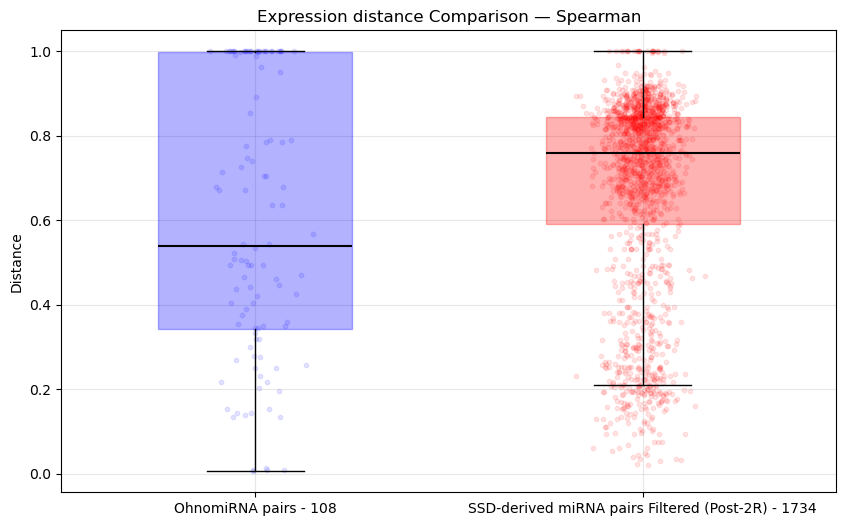

KS statistic: 0.28610790721517365, p-value: 7.426603922178586e-08


In [450]:
plot_distance_boxplot_comparison(om_distances, pm_filtered_distances, 'OhnomiRNA pairs', 'SSD-derived miRNA pairs Filtered (Post-2R)', metric, match_size=False, jitter=True)

/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


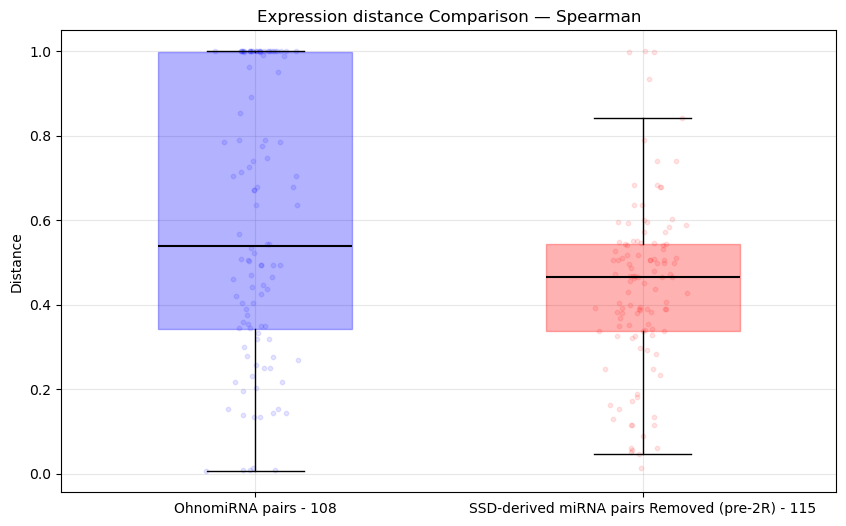

KS statistic: 0.35917874396135263, p-value: 6.369803137188443e-07


In [451]:
plot_distance_boxplot_comparison(om_distances, pm_removed_distances, 'OhnomiRNA pairs', 'SSD-derived miRNA pairs Removed (pre-2R)', metric, match_size=False, jitter=True)

/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


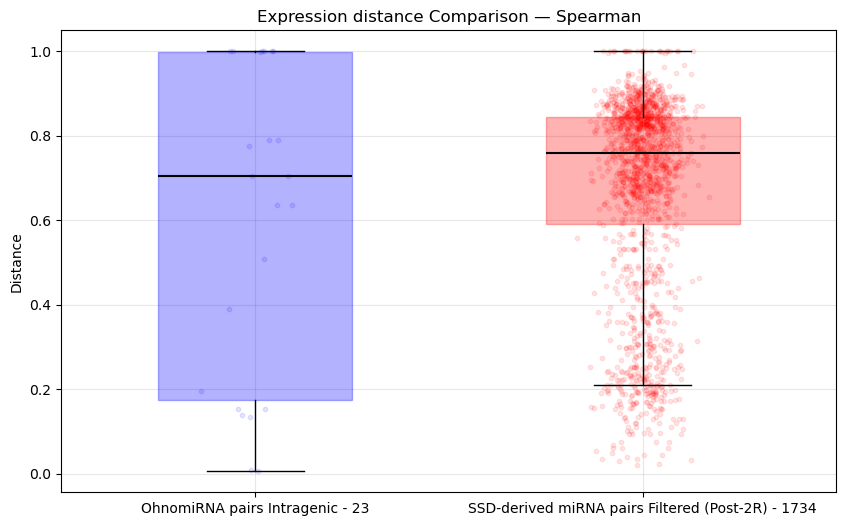

KS statistic: 0.2905069956371295, p-value: 0.03426070789976055
/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


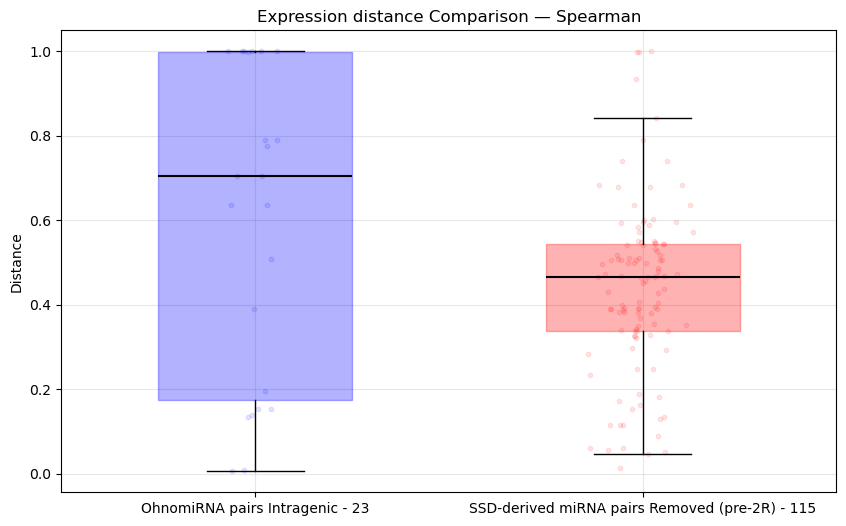

KS statistic: 0.4956521739130435, p-value: 8.925933694522706e-05
/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


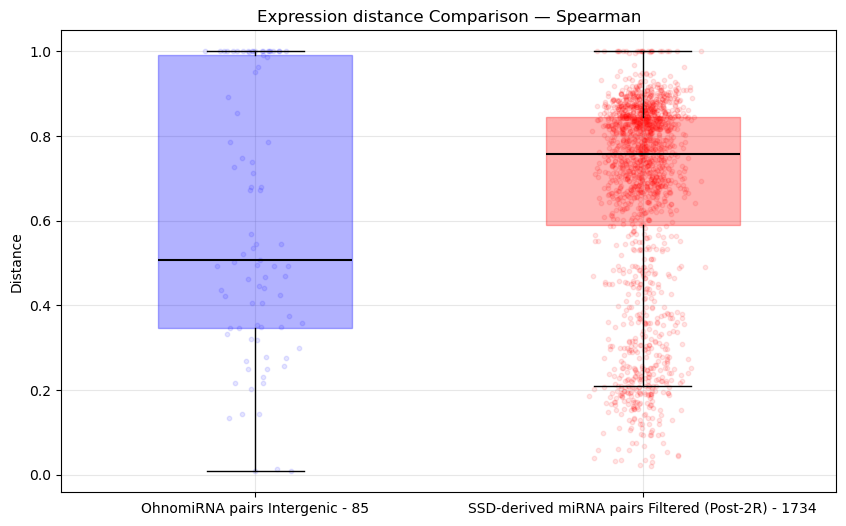

KS statistic: 0.32076124567474046, p-value: 6.558484066157225e-08
/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


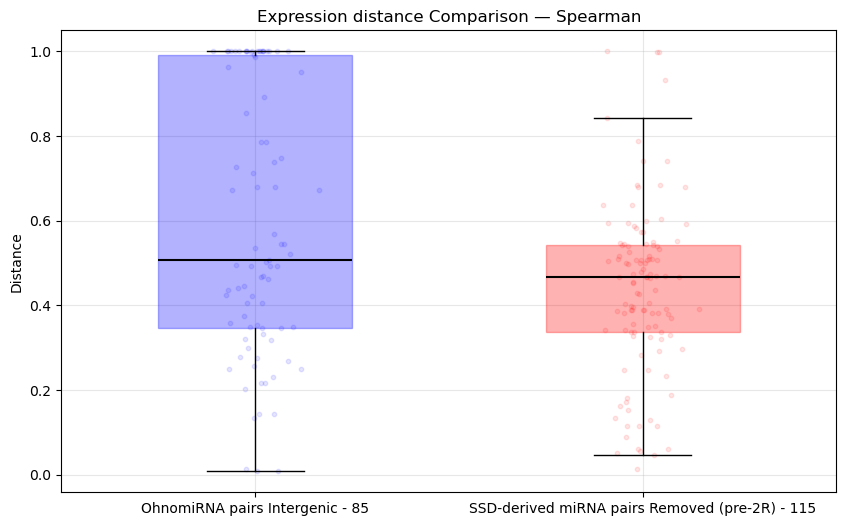

KS statistic: 0.3309462915601023, p-value: 2.9245472099312048e-05
/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


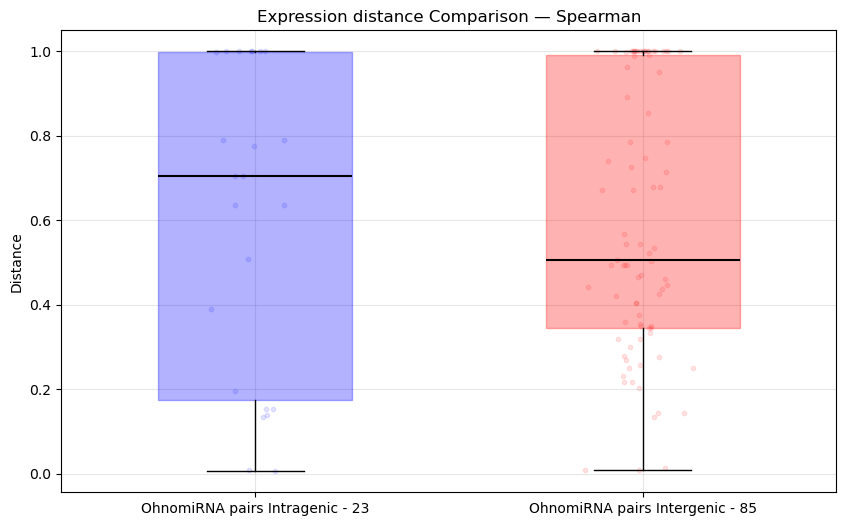

KS statistic: 0.23375959079283887, p-value: 0.23126303453759572


In [452]:
plot_distance_boxplot_comparison(om_intragenic_distances, pm_filtered_distances, 'OhnomiRNA pairs Intragenic', 'SSD-derived miRNA pairs Filtered (Post-2R)', metric, match_size=False, jitter=True)
plot_distance_boxplot_comparison(om_intragenic_distances, pm_removed_distances, 'OhnomiRNA pairs Intragenic', 'SSD-derived miRNA pairs Removed (pre-2R)', metric, match_size=False, jitter=True)
plot_distance_boxplot_comparison(om_intergenic_distances, pm_filtered_distances, 'OhnomiRNA pairs Intergenic', 'SSD-derived miRNA pairs Filtered (Post-2R)', metric, match_size=False, jitter=True)
plot_distance_boxplot_comparison(om_intergenic_distances, pm_removed_distances, 'OhnomiRNA pairs Intergenic', 'SSD-derived miRNA pairs Removed (pre-2R)', metric, match_size=False, jitter=True)
plot_distance_boxplot_comparison(om_intragenic_distances, om_intergenic_distances, 'OhnomiRNA pairs Intragenic', 'OhnomiRNA pairs Intergenic', metric, match_size=False, jitter=True)

____________________

## Compare with a set of random miRNA pairs

In [453]:
n_random_pairs = 2000

In [454]:
np.random.seed(42)

mirna_pairs = []
mirna_indices = df_coseq.index.tolist()
print(f"Number of miRNAs: {len(mirna_indices)}", file=sys.stderr)

mirna_pairs = [(np.random.choice(mirna_indices), np.random.choice(mirna_indices)) for _ in range(n_random_pairs)]

distances = {}
for mirna_1, mirna_2 in mirna_pairs:
	distance = pair_dist(mirna_1, mirna_2, df_coseq, metric)
	if distance is not None:
		distances[(mirna_1, mirna_2)] = distance


Number of miRNAs: 1761
Vector 1: [  0.      0.      0.      5.      7.      4.      3.      7.      8.
   8.5     6.      6.     11.      9.5    13.      4.      5.      4.
   4.      5.333   2.      0.      1.      3.      1.      0.      5.
   1.      1.      1.      3.      3.      0.      0.      5.      3.
   2.      2.      0.      0.      2.      3.      0.      4.      3.
   6.      5.      2.      1.      0.      2.      3.      2.      3.
   1.      2.      1.      0.      2.      2.      9.      5.      3.
   0.      4.      2.      2.      5.      6.      2.      5.      0.
   6.      6.      1.      2.      3.      3.      4.      8.      1.
   1.      0.      1.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      1.     30.5    21.5    15.5    31.833 176.5
   8.5    19.5    43.833   8.      5.     28.333  19.5     0.      2.
   1.      6.     13.      3.5     1.      0.5     5.   ]
Vector 2: [ 3.   8.   5.   6.   1.   3.   3.  12.  14.  28.  27.  36

/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


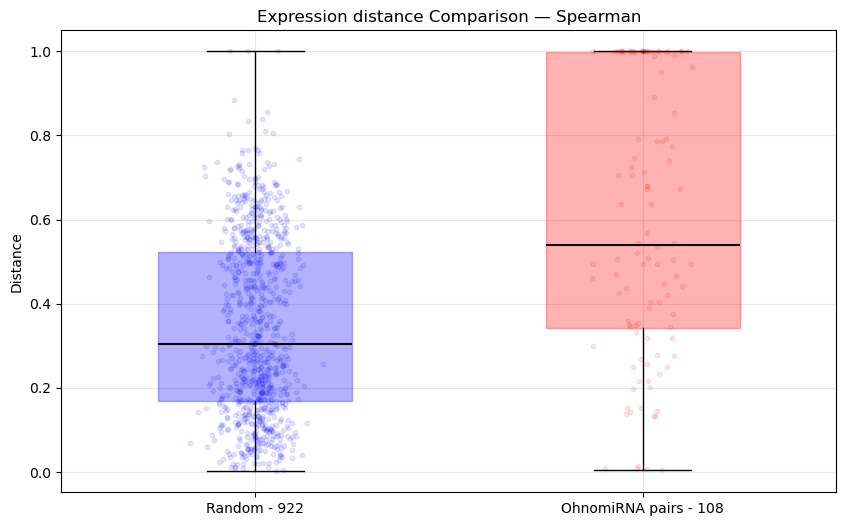

KS statistic: 0.3962199726841809, p-value: 3.711275154605325e-14
/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


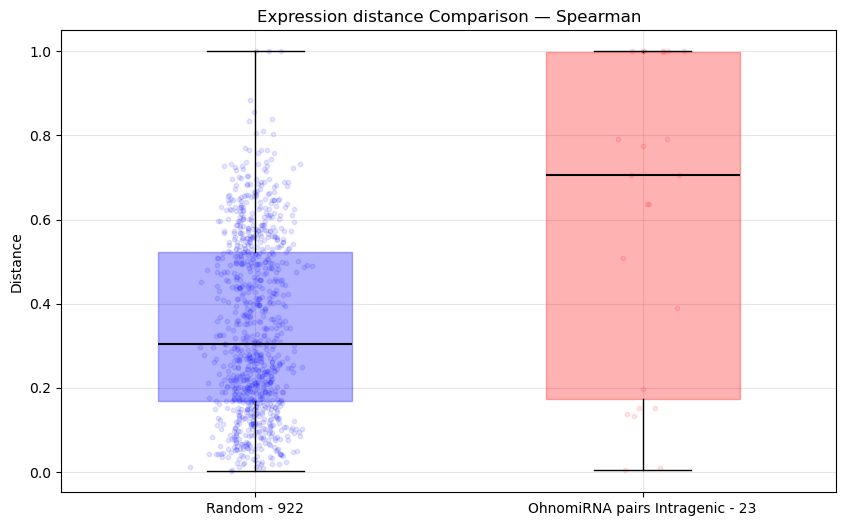

KS statistic: 0.5165047628029803, p-value: 4.42186185170654e-06
/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


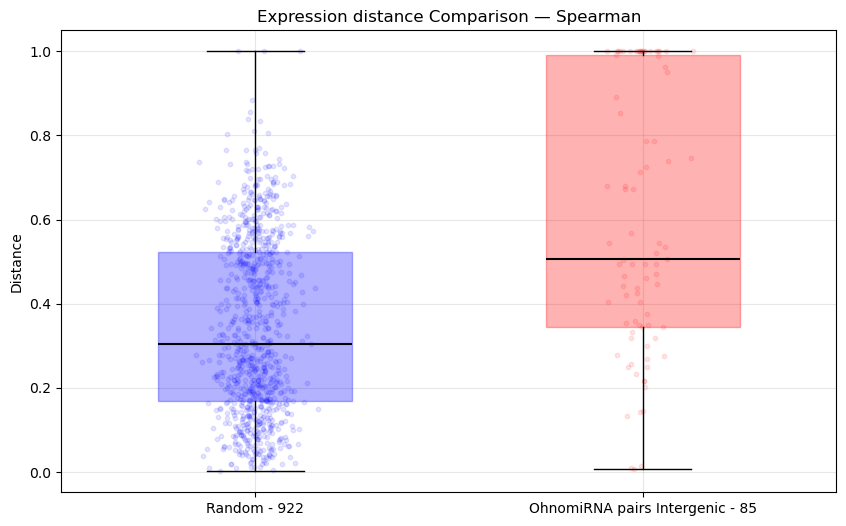

KS statistic: 0.377810386627536, p-value: 1.804125066195034e-10
/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


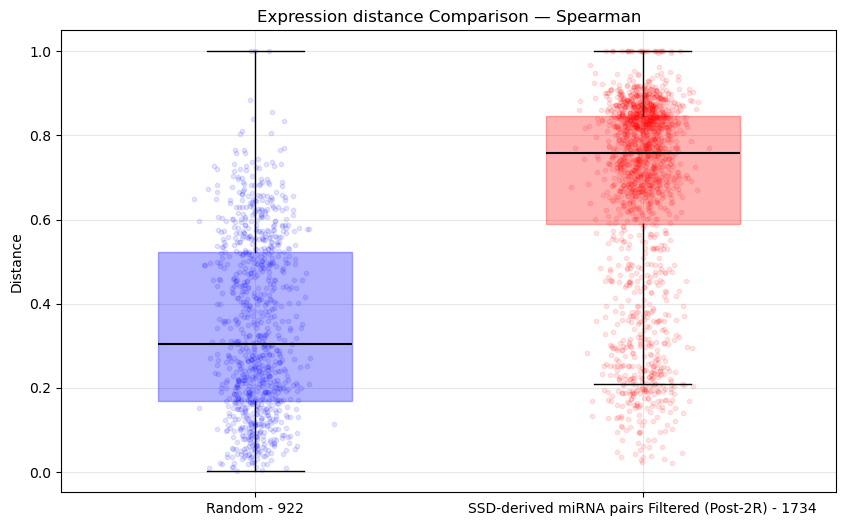

KS statistic: 0.6333518478209199, p-value: 7.057744598358476e-228
/tmp/ipykernel_2459/2039756903.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


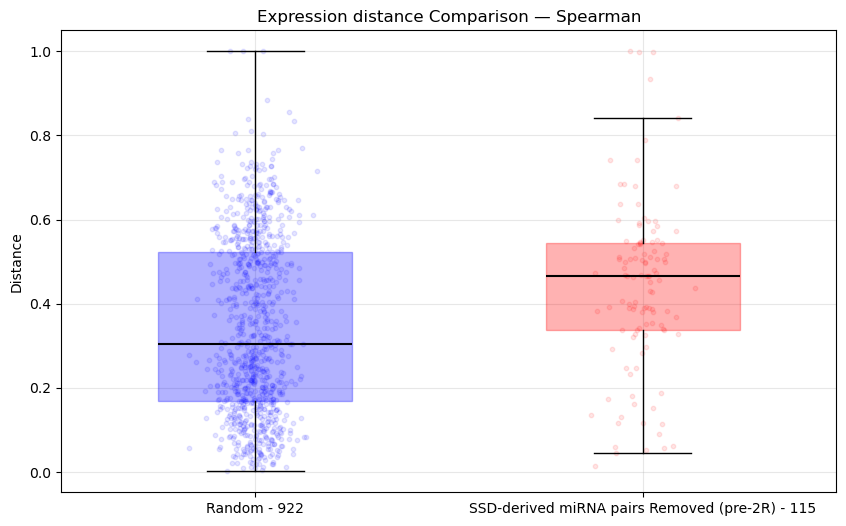

KS statistic: 0.32058851268508914, p-value: 7.552519282131963e-10


In [455]:
plot_distance_boxplot_comparison(list(distances.values()), om_distances, 'Random', 'OhnomiRNA pairs', metric, match_size=False, jitter=True)
plot_distance_boxplot_comparison(list(distances.values()), om_intragenic_distances, 'Random', 'OhnomiRNA pairs Intragenic', metric, match_size=False, jitter=True)
plot_distance_boxplot_comparison(list(distances.values()), om_intergenic_distances, 'Random', 'OhnomiRNA pairs Intergenic', metric, match_size=False, jitter=True)
plot_distance_boxplot_comparison(list(distances.values()), pm_filtered_distances, 'Random', 'SSD-derived miRNA pairs Filtered (Post-2R)', metric, match_size=False, jitter=True)
plot_distance_boxplot_comparison(list(distances.values()), pm_removed_distances, 'Random', 'SSD-derived miRNA pairs Removed (pre-2R)', metric, match_size=False, jitter=True)


_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Absolute expression levels

In [456]:
def extract_single_mirnas(pairs):
	"""
	Extract single miRNAs from pairs.
	"""
	singles = set()
	for pair in pairs:
		if pair[0] not in singles:
			singles.add(pair[0])
		if pair[1] not in singles:
			singles.add(pair[1])
	return singles

om_single = extract_single_mirnas(om_pairs)
om_single_intragenic = extract_single_mirnas(om_pairs_intragenic)
om_single_intergenic = extract_single_mirnas(om_pairs_intergenic)
pm_single_filtered = extract_single_mirnas(pm_pairs_filtered)
pm_single_removed = extract_single_mirnas(pm_pairs_removed)

# report
print(f"Number of single OhnomiRNAs: {len(om_single)}", file=sys.stderr)
print(f"Number of single OhnomiRNAs Intragenic: {len(om_single_intragenic)}", file=sys.stderr)
print(f"Number of single SSD-derived miRNAs Filtered: {len(pm_single_filtered)}", file=sys.stderr)
print(f"Number of single SSD-derived miRNAs Removed: {len(pm_single_removed)}", file=sys.stderr)

Number of single OhnomiRNAs: 137
Number of single OhnomiRNAs Intragenic: 38
Number of single SSD-derived miRNAs Filtered: 185
Number of single SSD-derived miRNAs Removed: 72


In [457]:
# remove from SSD-derived miRNAs those that are in OhnomiRNAs regardless of the order
pm_single_filtered = [mirna for mirna in pm_single_filtered if mirna not in om_single]
print(f"Number of single SSD-derived miRNAs Filtered after removing OhnomiRNAs: {len(pm_single_filtered)}", file=sys.stderr)
pm_single_removed = [mirna for mirna in pm_single_removed if mirna not in om_single]
print(f"Number of single SSD-derived miRNAs Removed after removing OhnomiRNAs: {len(pm_single_removed)}", file=sys.stderr)

Number of single SSD-derived miRNAs Filtered after removing OhnomiRNAs: 153
Number of single SSD-derived miRNAs Removed after removing OhnomiRNAs: 32


In [458]:
def compute_sum_expression(mirna, expr_df):
	# compute the average expression for a given miRNA in the whole dataset
	if mirna not in expr_df.index:
		print(f"MiRNA '{mirna}' not found in the expression DataFrame.", file=sys.stderr)
		return None
	expression_values = expr_df.loc[mirna].values
	sum_expression = np.sum(expression_values)
	return sum_expression

In [459]:
avg_expr_om = [compute_sum_expression(mirna, df_coseq) for mirna in om_single]
avg_expr_om_intragenic = [compute_sum_expression(mirna, df_coseq) for mirna in om_single_intragenic]
avg_expr_om_intergenic = [compute_sum_expression(mirna, df_coseq) for mirna in om_single_intergenic]
avg_expr_pm_filtered = [compute_sum_expression(mirna, df_coseq) for mirna in pm_single_filtered]
avg_expr_pm_removed = [compute_sum_expression(mirna, df_coseq) for mirna in pm_single_removed]

print(f"Number of average expression OhnomiRNAs: {len(avg_expr_om)}", file=sys.stderr)
print(f"Number of average expression OhnomiRNAs Intragenic: {len(avg_expr_om_intragenic)}", file=sys.stderr)
print(f"Number of average expression OhnomiRNAs Intergenic: {len(avg_expr_om_intergenic)}", file=sys.stderr)
print(f"Number of average expression SSD-derived miRNAs Filtered: {len(avg_expr_pm_filtered)}", file=sys.stderr)
print(f"Number of average expression SSD-derived miRNAs Removed: {len(avg_expr_pm_removed)}", file=sys.stderr)

MiRNA 'Hsa-Mir-337-as' not found in the expression DataFrame.
MiRNA 'Hsa-Mir-154-P10' not found in the expression DataFrame.
MiRNA 'Hsa-Mir-506-P1d' not found in the expression DataFrame.
MiRNA 'Hsa-Mir-154-P28' not found in the expression DataFrame.
MiRNA 'Hsa-Mir-376-P1' not found in the expression DataFrame.
MiRNA 'Hsa-Mir-506-P1d' not found in the expression DataFrame.
Number of average expression OhnomiRNAs: 137
Number of average expression OhnomiRNAs Intragenic: 38
Number of average expression OhnomiRNAs Intergenic: 109
Number of average expression SSD-derived miRNAs Filtered: 153
Number of average expression SSD-derived miRNAs Removed: 32


In [460]:
def plot_expression_comparison(expr_vec_1, expr_vec_2, label_1, label_2):
	"""
	Plot side-by-side boxplots (with scatter dots, notches, and medians)
	for OhnomiRNAs and SSD-derived miRNA pairs distance distributions.
	"""
	# remove entries that are not numeric
	expr_vec_1 = [float(x) for x in expr_vec_1 if isinstance(x, (int, float))]
	expr_vec_2 = [float(x) for x in expr_vec_2 if isinstance(x, (int, float))]

	expr_vec_1 = np.array(expr_vec_1)
	expr_vec_2 = np.array(expr_vec_2)


	expr_vec_1 = expr_vec_1[expr_vec_1 > 0]
	expr_vec_2 = expr_vec_2[expr_vec_2 > 0]

	data = [expr_vec_1, expr_vec_2]
	labels = [f'{label_1} - {len(expr_vec_1)}', f'{label_2} - {len(expr_vec_2)}']
	colors = ['blue', 'red']

	plt.figure(figsize=(10, 6))
	
	# Boxplot with notches and median lines
	box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)

	for patch, color in zip(box['boxes'], colors):
		patch.set_facecolor(color)
		patch.set_alpha(0.3)
		patch.set_edgecolor(color)
		box['medians'][0].set_color('black')
		box['medians'][1].set_color('black')
		box['medians'][0].set_linewidth(1.5)
		box['medians'][1].set_linewidth(1.5)

	plt.ylabel('Average Expression')
	plt.title(f'Expression Comparison')
	plt.grid(alpha=0.3)
	plt.show()

	print(f"Kolmogorov-Smirnov test: {ks_2samp(expr_vec_1, expr_vec_2)}", file=sys.stderr)

/tmp/ipykernel_2459/1891616764.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


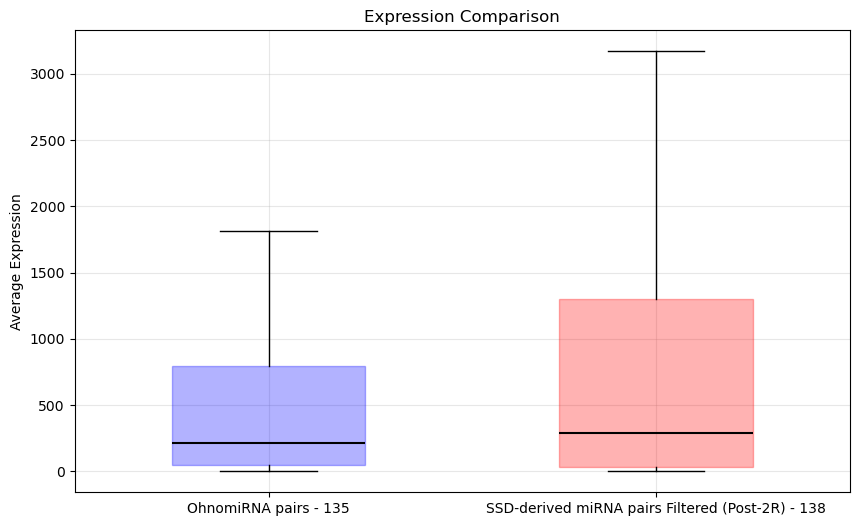

Kolmogorov-Smirnov test: KstestResult(statistic=0.11223832528180354, pvalue=0.3230189400498447, statistic_location=1184.0, statistic_sign=1)
/tmp/ipykernel_2459/1891616764.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


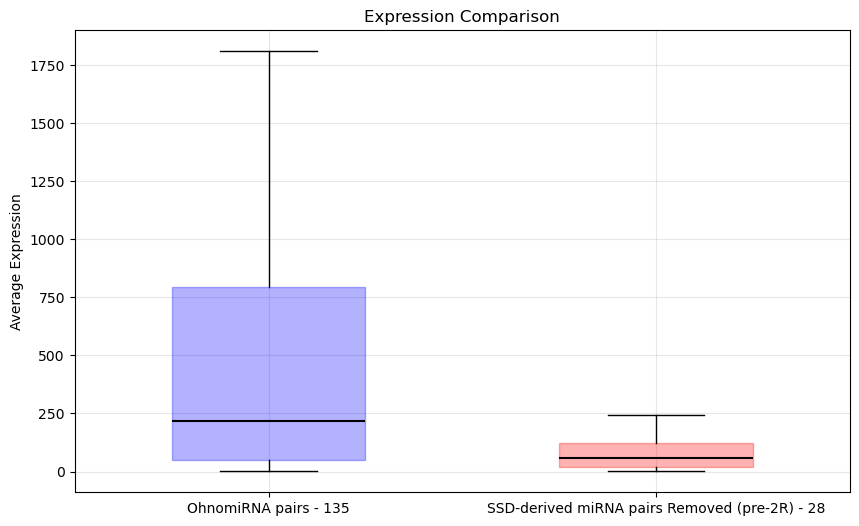

Kolmogorov-Smirnov test: KstestResult(statistic=0.37486772486772485, pvalue=0.0019746669619540584, statistic_location=84.0, statistic_sign=-1)


In [461]:
plot_expression_comparison(avg_expr_om, avg_expr_pm_filtered, 'OhnomiRNA pairs', 'SSD-derived miRNA pairs Filtered (Post-2R)')
plot_expression_comparison(avg_expr_om, avg_expr_pm_removed, 'OhnomiRNA pairs', 'SSD-derived miRNA pairs Removed (pre-2R)')